In [1]:
!pip install tensorflow

In [30]:
!pip install pandas_datareader

In [3]:
!pip install scikit-learn

In [75]:
import sklearn

In [44]:
import pandas as pd
import numpy as np

from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# from tensorflow.keras.Layers import Dense, LSTM

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
# data = pd.read_csv("Tesla.csv")
# data['Date'] = pd.to_datetime(data.Date)
# data = data.set_index(['Date'])
# data


In [58]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)
data = DataReader(
            'AAPL',
            'yahoo',
            start,
            end)
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-08-06,37.355713,36.804287,37.111427,37.155716,111224400.0,32.165604
2010-08-09,37.450001,37.081429,37.354286,37.392857,75782000.0,32.370895
2010-08-10,37.207142,36.792858,37.121429,37.058571,112980000.0,32.081516
2010-08-11,36.527142,35.687141,36.485714,35.741428,155013600.0,30.941259
2010-08-12,36.157143,35.160000,35.241428,35.970001,133730100.0,31.139137
2010-08-13,35.982857,35.584286,35.950001,35.585712,88717300.0,30.806463
2010-08-16,35.715714,35.231430,35.368572,35.377144,79607500.0,30.625906
2010-08-17,36.375713,35.599998,35.725716,35.995716,105660100.0,31.161400
2010-08-18,36.381428,35.939999,36.051430,36.152859,84924000.0,31.297430


In [59]:
# data['Date'] = pd.to_datetime(data.index, format='%y-%m-%d', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2519 entries, 2010-08-06 to 2020-08-07
Data columns (total 6 columns):
High         2519 non-null float64
Low          2519 non-null float64
Open         2519 non-null float64
Close        2519 non-null float64
Volume       2519 non-null float64
Adj Close    2519 non-null float64
dtypes: float64(6)
memory usage: 137.8 KB


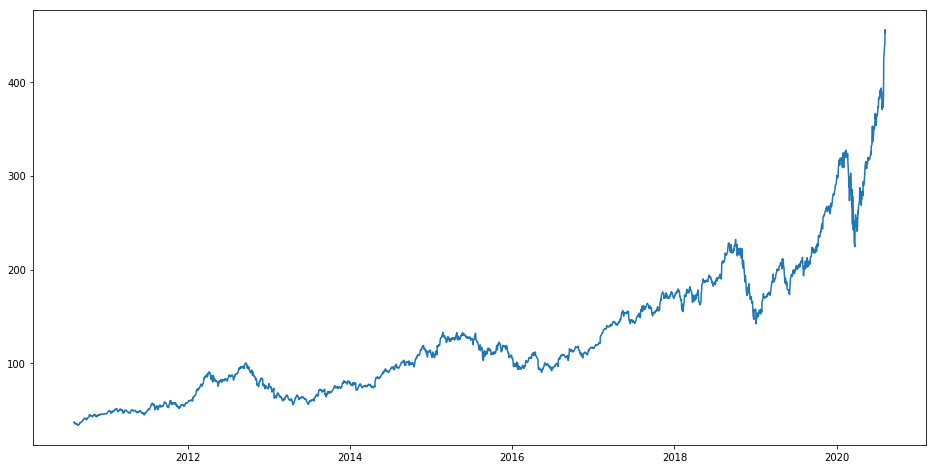

In [60]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Close Price history')

In [61]:
dataset = pd.DataFrame(index=(range(0,len(data))),columns=['Date','Close'])
data = data.sort_index(ascending=True, axis=0)
dataset['Date'] = data.index
dataset = dataset.set_index(['Date'])
dataset['Close'] = data['Close']
# data['Date']

dataset

,Close
Date,
2010-08-06,37.155716
2010-08-09,37.392857
2010-08-10,37.058571
2010-08-11,35.741428
2010-08-12,35.970001
2010-08-13,35.585712
2010-08-16,35.377144
2010-08-17,35.995716
2010-08-18,36.152859


In [62]:
split = int(len(dataset)*0.75)
X = dataset.values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[0.00683543],
       [0.00739826],
       [0.00660487],
       ...,
       [0.96354442],
       [1.        ],
       [0.99283232]])

In [63]:
train = scaled_data[:split,:]
valid = scaled_data[split:,:]
X_train = []
y_train = []
for i in range(60, len(train)):
    X_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1829, 60, 1)

In [64]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(25, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer= 'adam',
             loss = 'mean_squared_error')


In [65]:
model.fit(X_train, 
          y_train,
         epochs=2)

Train on 1829 samples
Epoch 1/2
1829/1829 [==============================] - 5s 3ms/sample - loss: 0.0027
Epoch 2/2
1829/1829 [==============================] - 2s 1ms/sample - loss: 8.6285e-05


In [66]:
test_data  = scaled_data[split-60:,:]
X_test = []
for i in range(60,(len(test_data))):
    X_test.append(test_data[i-60:i,:])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_test = X[split:,:]
result = model.predict(X_test)
result = scaler.inverse_transform(result)

rmse = np.sqrt(np.mean((y_test-result)**2))


In [67]:
test = pd.DataFrame(index=dataset[split:].index, columns=['Close'])
# test['Date'] = dataset[split:].index
test['Close'] = result
# test = test.set_index(['Date'])
test

,Close
Date,
2018-02-07,173.523956
2018-02-08,172.304504
2018-02-09,170.950027
2018-02-12,169.584488
2018-02-13,168.462677
2018-02-14,167.607773
2018-02-15,167.080307
2018-02-16,166.997406
2018-02-20,167.222321


RMS error for this dataset is:  12.526595529510827

Below shown is the graph suggesting the predicted values vs Actual values of the closing price of Tesla stock for the respective dates


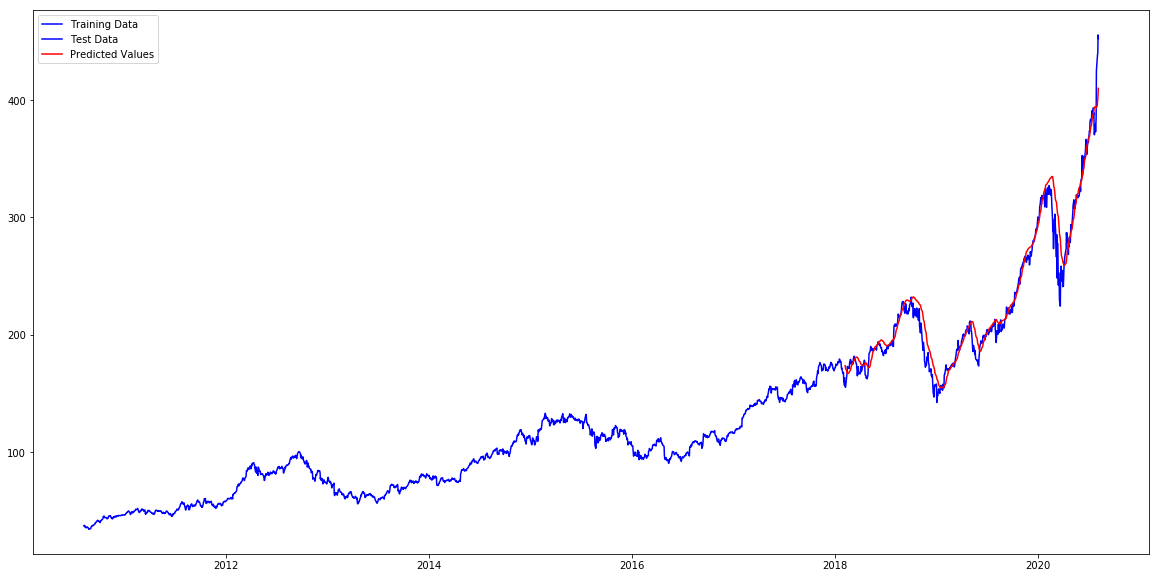

In [68]:
plt.figure(figsize=(20,10))
plt.plot(dataset[:split], label='Training Data', color='blue')
plt.plot(dataset[split:], label='Test Data', color='blue')
plt.plot(test['Close'], label='Predicted Values', color='red')
plt.legend()
plt.savefig("Apple.jpg", dpi=300, bbox_inches='tight')
print("RMS error for this dataset is: ", rmse)
print()
print("Below shown is the graph suggesting the predicted values vs Actual values of the closing price of Tesla stock for the respective dates")